In [1]:
import pandas as pd

In [2]:
sentiment=pd.read_csv("final.csv")

In [3]:
sentiment.head()

,Unnamed: 0,new_reviews,polarity,subjectivity,emotion-sp
0,1,project management professional pmp industryre...,0.1,0.10,0
1,3,you re select good performer certify six sigma...,0.6,0.80,1
2,4,sap fico important core functional component s...,0.4,1.00,1
3,18,rank 1 divya gokhale rank 2 reet mahajan rank ...,-0.8,0.90,-1
4,23,write book great salesman world book sell 50 m...,0.8,0.75,1


In [4]:
sentiment.describe()

,Unnamed: 0,polarity,subjectivity,emotion-sp
count,957.000000,957.000000,957.000000,957.000000
mean,872.203762,0.474464,0.631078,0.695925
std,433.975860,0.328472,0.264496,0.486764
min,1.000000,-0.800000,0.000000,-1.000000
25%,541.000000,0.266667,0.500000,0.000000
50%,865.000000,0.500000,0.600000,1.000000
75%,1223.000000,0.700000,0.875000,1.000000
max,1634.000000,1.000000,1.000000,1.000000


In [ ]:
#Polarity= Its on the positive side
#Subjectivity= Quite high, hence difficult to conclude, more based on individual opnions and emotions
#emotion= Mostly positive

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emotion-sp', ylabel='count'>

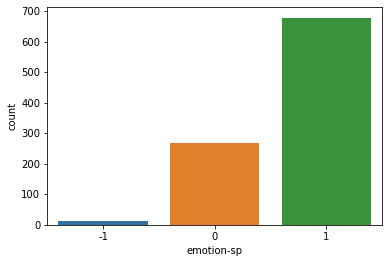

In [7]:
sns.countplot(sentiment['emotion-sp'])

In [ ]:
#this signifies most are positive reviews with very low negative reviews

In [8]:
sentiment.corr()

,Unnamed: 0,polarity,subjectivity,emotion-sp
Unnamed: 0,1.000000,0.078743,0.075341,0.055164
polarity,0.078743,1.000000,0.525415,0.829026
subjectivity,0.075341,0.525415,1.000000,0.530302
emotion-sp,0.055164,0.829026,0.530302,1.000000


In [ ]:
#slight positive correlation between subjectivity and sentiment

(array([ 10.,   2.,   4.,  33.,  65., 132., 190., 161., 272.,  88.]),
 array([-0.8 , -0.62, -0.44, -0.26, -0.08,  0.1 ,  0.28,  0.46,  0.64,
         0.82,  1.  ]),
 <BarContainer object of 10 artists>)

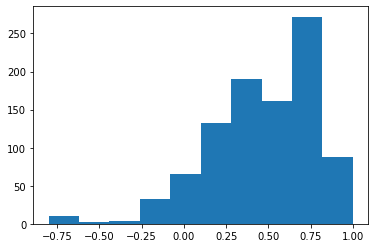

In [9]:
plt.hist(sentiment['polarity'])

(array([ 29.,  23.,  78.,  38.,  60., 320.,  38.,  78.,  60., 233.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

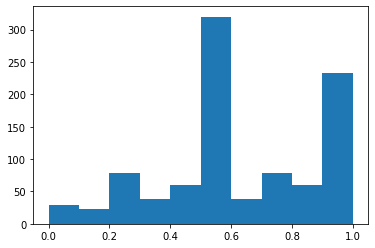

In [10]:
plt.hist(sentiment['subjectivity'])

In [11]:
import numpy as np

In [12]:
for i in range(0,len(sentiment)-1):
    if type(sentiment.iloc[i]['new_reviews']) != str:
        sentiment.iloc[i]['new_reviews'] = str(sentiment.iloc[i]['new_reviews'])

In [13]:
sentiment['length'] = sentiment['new_reviews'].apply(len)

In [14]:
sentiment.head()

,Unnamed: 0,new_reviews,polarity,subjectivity,emotion-sp,length
0,1,project management professional pmp industryre...,0.1,0.10,0,220
1,3,you re select good performer certify six sigma...,0.6,0.80,1,189
2,4,sap fico important core functional component s...,0.4,1.00,1,239
3,18,rank 1 divya gokhale rank 2 reet mahajan rank ...,-0.8,0.90,-1,193
4,23,write book great salesman world book sell 50 m...,0.8,0.75,1,186


<AxesSubplot:xlabel='emotion-sp', ylabel='length'>

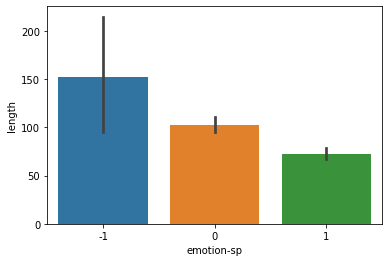

In [15]:
sns.barplot(x="emotion-sp",y="length",data=sentiment)

In [ ]:
#length is highest for negative reviews

<AxesSubplot:ylabel='Frequency'>

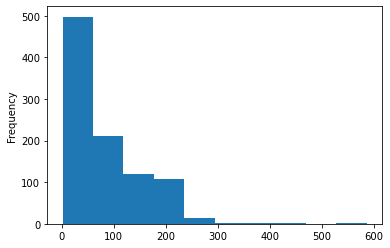

In [16]:
sentiment['length'].plot(bins=10,kind='hist')

In [ ]:
#max reviews are within 0 to 50 characters

<AxesSubplot:ylabel='Density'>

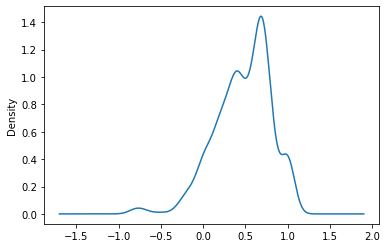

In [17]:
sentiment["polarity"].plot.density()

<AxesSubplot:ylabel='Density'>

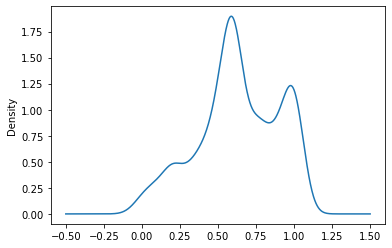

In [18]:
sentiment["subjectivity"].plot.density()

In [25]:
#Word Cloud 
words = ' '.join([str(elem) for elem in sentiment['new_reviews']])
words

'project management professional pmp industryrecognize certification project manager worldwide responsible drive execution growth multiple project respective organization check course httpstcozo30slv2ta httpstcob6zk1akvst you re select good performer certify six sigma green belt training course ssgb 4th april 2021 henry harvin information course visit website httpstcoobvmpi9olt henryharvin httpstcouq3ppo7go0 sap fico important core functional component sap erp central component allow organization manage financial datum sap fico allow organization store financial transaction datum enroll course please visit httpstcoxvesnyfl2x httpstcozprfvlsnnp rank 1 divya gokhale rank 2 reet mahajan rank 3 nidhi kyal many many congratulation team henry harvin proud keep write keep create value henryharvin education winner achiever httpstcog5nqgwzmte write book great salesman world book sell 50 million copy translate 25 language president success unlimited magazine 1976 induct national speaker associat

In [26]:
from wordcloud import WordCloud

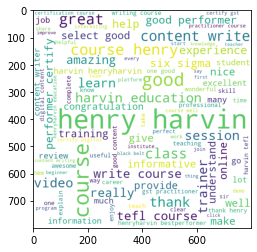

In [34]:
wc = WordCloud(width = 800, height = 800, background_color='white',max_words=100,min_font_size = 10).generate(words)
plt.imshow(wc)

In [35]:
wc.to_file('WordCloud3.png')